# Predicting heart disease using machine learning

We're going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
> Given the clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1.  age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
     * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 5. Preparing the tools

Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [91]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

## Load data

In [3]:
df = pd.read_csv('new_heart_disease.csv')
df.shape # (rows, columns)

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

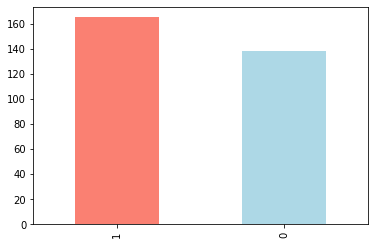

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Compare target column with sex column

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Plot the crosstab

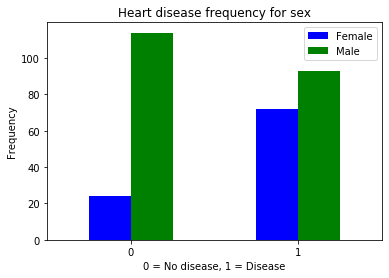

In [28]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(6,4),
                                   color=['blue', 'green'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max heart rate for heart disease

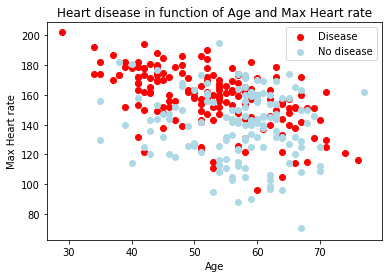

In [22]:
#Create another figure
plt.figure(figsize=(6,4))

#Scatter with positive examples (target =1)
plt.scatter(df.age[df.target==1], #age column where target==1
           df.thalach[df.target==1], #thalach column where target==1
           c='red');

#Scatter with negative examples (target =0)
plt.scatter(df.age[df.target==0], #age column where target==1
           df.thalach[df.target==0], #thalach column where target==1
           c='lightblue');

plt.title('Heart disease in function of Age and Max Heart rate')
plt.xlabel('Age')
plt.ylabel('Max Heart rate')
plt.legend(['Disease', 'No disease']);

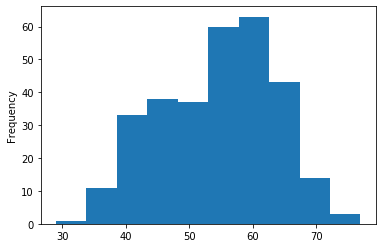

In [24]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


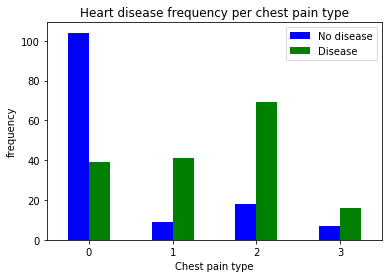

In [27]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(6,4),
                                  color=['blue', 'green'])

plt.title('Heart disease frequency per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('frequency')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0);

Correlation matrix

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


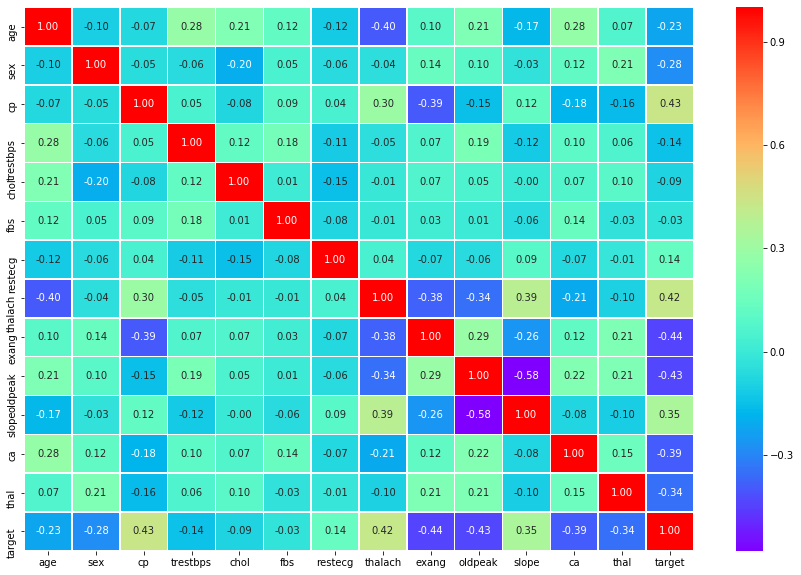

In [36]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='rainbow')

# we need to adjust the axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5); #move bottom up and top down

## Modeling

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
#Split data into X and y
X = df.drop('target', axis=1)
y=df['target']

In [40]:
#set seed
np.random.seed(14)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Put models in a dictionary

In [43]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    """
    #set random seed
    np.random.seed(42)
    #Make a dictionary to keep model score
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [44]:
model_scores = fit_and_score(models = models,
                            X_train=X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.7868852459016393,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.6885245901639344}

## Model comparison

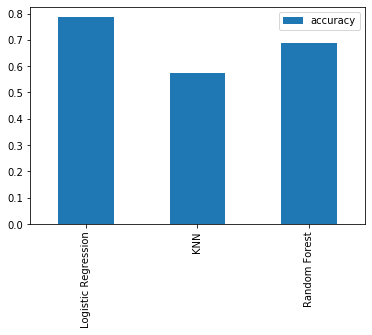

In [47]:
#NB: The default score measure is accuracy
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); #T is for transpose and create a better graph

Let's do the following:

1. Hyperparameter tuning
2. Feature importance
3. confusion matrix
4. Cross-validation
5. Precision
6. Recall
7. F-1 score
8. Classification
9. ROC Curve
10. Area under the curve (AUC)

### Hyperparameter tuning

### KNN

In [48]:
# Let's tune KNN

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Set up KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors =i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [49]:
train_scores

[1.0,
 0.8181818181818182,
 0.8016528925619835,
 0.78099173553719,
 0.768595041322314,
 0.7603305785123967,
 0.743801652892562,
 0.7272727272727273,
 0.71900826446281,
 0.731404958677686,
 0.7148760330578512,
 0.7231404958677686,
 0.7231404958677686,
 0.7231404958677686,
 0.731404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.7231404958677686,
 0.7272727272727273,
 0.7272727272727273]

Visualize the scores

Maximum KNN score on the test data: 62.30%


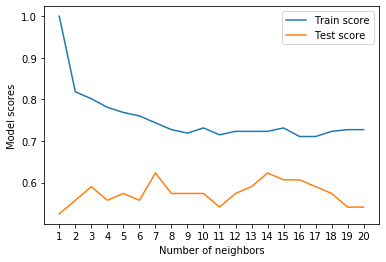

In [53]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model scores')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

We see that n_neighbors value of 14 yields the best value on the test data

### Hyperparameter tuning with RandomizedSearchCV

### Logistic Regression and Random Forest

Create hyperparameters

In [60]:
#Create a hyperparameter grid for LR
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

Let's tune the models

1. Logistic Regression

In [56]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [57]:
#See the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [58]:
#Check score
rs_log_reg.score(X_test, y_test)

0.8032786885245902

2. Random Forest Classifier()

In [62]:
np.random.seed(42)

#Set up random hyperparameters 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose=True)

#Fit hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [63]:
#Find best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [64]:
# Evaluate the RandomizedSearch Random Forest Classifier model
rs_rf.score(X_test, y_test)

0.7213114754098361

### Hyperparameter tuning with GridSearchCV

In [65]:
# Different hyperparameter for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver': ['liblinear']}

#set up grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit the grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
# Check best parameter
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [67]:
#Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

Logistic regression gives the result

In [71]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

## Model Evaluation

### 1. ROC Curve

In [83]:
#Plot ROC Curve
plot_roc_curve(gs_log_reg, X_test, y_test);

### 2. Confusion matrix

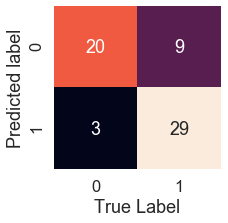

In [100]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted label')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

### 3. Classification report

In [101]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      0.91      0.83        32

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



* Precision is 1 when false positive is 0
* Recall is 1 when false negative is 0
* f1 score is a combination of precision and recall

### Calculate evaluation metrics using cross-validation

In [102]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [104]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725,
                        solver = 'liblinear')

In [106]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')

cv_acc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [107]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8380874316939891

In [108]:
#Cross-validated precison
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

In [110]:
#Cross-validated recall
#Use command to select places you want to edit simultaneously
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

In [115]:
#Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

Visualize cross-validated metrics

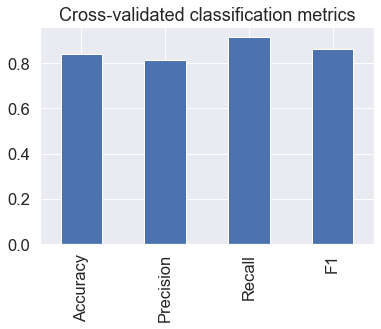

In [118]:
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall':cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                    legend=False);

### Feature importance

- Which features contributed most to the outcomes of the odel and how much did they contribute?

We start with logistic model

In [123]:
clf = LogisticRegression(C=0.38566204211634725,
                        solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
#View coefficients
clf.coef_

array([[ 0.01248502, -1.05797231,  0.74877294, -0.0178874 , -0.0019596 ,
         0.1511739 ,  0.19492155,  0.0310136 , -0.5576563 , -0.4364796 ,
         0.51151278, -0.72324244, -0.92639224]])

In [125]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.012485020755961366,
 'sex': -1.0579723093837365,
 'cp': 0.7487729355173062,
 'trestbps': -0.01788739712514853,
 'chol': -0.0019595968268027223,
 'fbs': 0.15117390002708028,
 'restecg': 0.1949215504692388,
 'thalach': 0.031013597567261603,
 'exang': -0.5576563032426274,
 'oldpeak': -0.43647959875067627,
 'slope': 0.5115127803652868,
 'ca': -0.723242442056615,
 'thal': -0.9263922375005958}

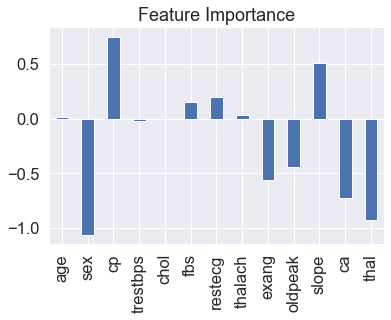

In [126]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

End of notebook!